In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset1 = pd.read_csv('/content/drive/MyDrive/ML cleaned Datasets/bitcoin_price.csv')

In [ ]:
dataset1 = dataset1.drop_duplicates()
print(dataset1)

              Date     Open     High      Low    Close         Volume  \
0     Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   
1     Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
2     Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
3     Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
4     Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   
...            ...      ...      ...      ...      ...            ...   
1551  May 02, 2013   116.38   125.60    92.28   105.21              -   
1552  May 01, 2013   139.00   139.89   107.72   116.99              -   
1553  Apr 30, 2013   144.00   146.93   134.05   139.00              -   
1554  Apr 29, 2013   134.44   147.49   134.00   144.54              -   
1555  Apr 28, 2013   135.30   135.98   132.10   134.21              -   

          Market Cap  
0     45,535,800,000  
1     44,890,700,000  
2     46,246,700,000  
3     44,144,400,000  
4     41

In [ ]:
dataset1.isnull()

,Date,Open,High,Low,Close,Volume,Market Cap
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1551,False,False,False,False,False,False,False
1552,False,False,False,False,False,False,False
1553,False,False,False,False,False,False,False
1554,False,False,False,False,False,False,False


In [ ]:
dataset1.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [ ]:
for column in dataset1.columns:
    if dataset1[column].dtype == 'object':
        print(column)

Date
Volume
Market Cap


# **Data Preprocessing **

In [ ]:
dataset1.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [ ]:
import pandas as pd
# Preprocessing - Convert Date column to datetime format
dataset1['Date'] = pd.to_datetime(dataset1['Date'])
# Replace non-numeric characters with NaN and convert to float
dataset1['Volume'] = pd.to_numeric(dataset1['Volume'].str.replace(',', ''), errors='coerce')
dataset1['Market Cap'] = pd.to_numeric(dataset1['Market Cap'].str.replace(',', ''), errors='coerce')

# Print the DataFrame
print(dataset1)


           Date     Open     High      Low    Close        Volume   Market Cap
0    2017-07-31  2763.24  2889.62  2720.61  2875.34  8.605750e+08  45535800000
1    2017-07-30  2724.39  2758.53  2644.85  2757.18  7.059430e+08  44890700000
2    2017-07-29  2807.02  2808.76  2692.80  2726.45  8.037460e+08  46246700000
3    2017-07-28  2679.73  2897.45  2679.73  2809.01  1.380100e+09  44144400000
4    2017-07-27  2538.71  2693.32  2529.34  2671.78  7.891040e+08  41816500000
...         ...      ...      ...      ...      ...           ...          ...
1551 2013-05-02   116.38   125.60    92.28   105.21           NaN   1292190000
1552 2013-05-01   139.00   139.89   107.72   116.99           NaN   1542820000
1553 2013-04-30   144.00   146.93   134.05   139.00           NaN   1597780000
1554 2013-04-29   134.44   147.49   134.00   144.54           NaN   1491160000
1555 2013-04-28   135.30   135.98   132.10   134.21           NaN   1500520000

[1556 rows x 7 columns]


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming dataset1 is your pandas DataFrame
# Load your dataset into pandas DataFrame

# Print the original dataset
print("Original Dataset:")
print(dataset1)


# Normalization - Using Min-Max Scaler for 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap' columns
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset1.iloc[:, 1:])  # Exclude 'Date' column from normalization
normalized_dataset = pd.DataFrame(normalized_data, columns=dataset1.columns[1:])  # Exclude 'Date' column

# Standardization - Using Standard Scaler for 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap' columns
scaler = StandardScaler()
standardized_data = scaler.fit_transform(dataset1.iloc[:, 1:])  # Exclude 'Date' column from standardization
standardized_dataset = pd.DataFrame(standardized_data, columns=dataset1.columns[1:])  # Exclude 'Date' column

# Print the preprocessed, normalized, and standardized datasets
print("\nPreprocessed Dataset:")
print(dataset1)

print("\nNormalized Dataset:")
print(normalized_dataset)

print("\nStandardized Dataset:")
print(standardized_dataset)


Original Dataset:
           Date     Open     High      Low    Close        Volume   Market Cap
0    2017-07-31  2763.24  2889.62  2720.61  2875.34  8.605750e+08  45535800000
1    2017-07-30  2724.39  2758.53  2644.85  2757.18  7.059430e+08  44890700000
2    2017-07-29  2807.02  2808.76  2692.80  2726.45  8.037460e+08  46246700000
3    2017-07-28  2679.73  2897.45  2679.73  2809.01  1.380100e+09  44144400000
4    2017-07-27  2538.71  2693.32  2529.34  2671.78  7.891040e+08  41816500000
...         ...      ...      ...      ...      ...           ...          ...
1551 2013-05-02   116.38   125.60    92.28   105.21           NaN   1292190000
1552 2013-05-01   139.00   139.89   107.72   116.99           NaN   1542820000
1553 2013-04-30   144.00   146.93   134.05   139.00           NaN   1597780000
1554 2013-04-29   134.44   147.49   134.00   144.54           NaN   1491160000
1555 2013-04-28   135.30   135.98   132.10   134.21           NaN   1500520000

[1556 rows x 7 columns]

Preproce

In [ ]:
dataset1.duplicated().sum()

0

In [ ]:
dataset = dataset1.dropna()
print(dataset)

           Date     Open     High      Low    Close        Volume   Market Cap
0    2017-07-31  2763.24  2889.62  2720.61  2875.34  8.605750e+08  45535800000
1    2017-07-30  2724.39  2758.53  2644.85  2757.18  7.059430e+08  44890700000
2    2017-07-29  2807.02  2808.76  2692.80  2726.45  8.037460e+08  46246700000
3    2017-07-28  2679.73  2897.45  2679.73  2809.01  1.380100e+09  44144400000
4    2017-07-27  2538.71  2693.32  2529.34  2671.78  7.891040e+08  41816500000
...         ...      ...      ...      ...      ...           ...          ...
1308 2013-12-31   760.32   760.58   738.17   754.01  2.089730e+07   9268240000
1309 2013-12-30   741.35   766.60   740.24   756.13  2.070770e+07   9037000000
1310 2013-12-29   728.05   748.61   714.44   745.05  1.901130e+07   8872600000
1311 2013-12-28   737.98   747.06   705.35   727.83  3.250580e+07   8990850000
1312 2013-12-27   763.28   777.51   713.60   735.07  4.686270e+07   9295570000

[1313 rows x 7 columns]


**`Data Summarization `**

In [ ]:
dataset.dtypes

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap             int64
dtype: object

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1313 entries, 0 to 1312
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1313 non-null   datetime64[ns]
 1   Open        1313 non-null   float64       
 2   High        1313 non-null   float64       
 3   Low         1313 non-null   float64       
 4   Close       1313 non-null   float64       
 5   Volume      1313 non-null   float64       
 6   Market Cap  1313 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.1 KB


In [ ]:
dataset.describe()

,Open,High,Low,Close,Volume,Market Cap
count,1313.000000,1313.000000,1313.000000,1313.000000,1.313000e+03,1.313000e+03
mean,645.102285,660.689474,630.430274,646.565819,1.481643e+08,9.765525e+09
std,535.041809,556.127598,517.124878,538.203788,3.242987e+08,8.975974e+09
min,176.900000,211.730000,171.510000,178.100000,2.857830e+06,2.427830e+09
25%,327.580000,334.660000,320.480000,327.920000,2.071070e+07,4.593400e+09
50%,463.550000,478.620000,454.940000,463.620000,4.530140e+07,6.729120e+09
75%,688.000000,705.260000,669.590000,688.310000,9.037880e+07,1.033890e+10
max,2953.220000,2999.910000,2840.530000,2958.110000,2.569530e+09,4.839120e+10


In [ ]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,8.605750e+08,45535800000
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,7.059430e+08,44890700000
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,8.037460e+08,46246700000
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,1.380100e+09,44144400000
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,7.891040e+08,41816500000


# **Data Visualization **

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [ ]:
visualize_XRP = cycle(['Open','Close','High','Low','Market Cap'])

fig = px.line(dataset, x=dataset.Date, y=[dataset['Open'], dataset['Close'],
                                          dataset['High'], dataset['Low'],dataset['Market Cap']],
             labels={'Date': 'Date','value':'Price'})
fig.update_layout(title_text='Bitcoin', font_size=15, font_color='black',legend_title_text='Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(visualize_XRP)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

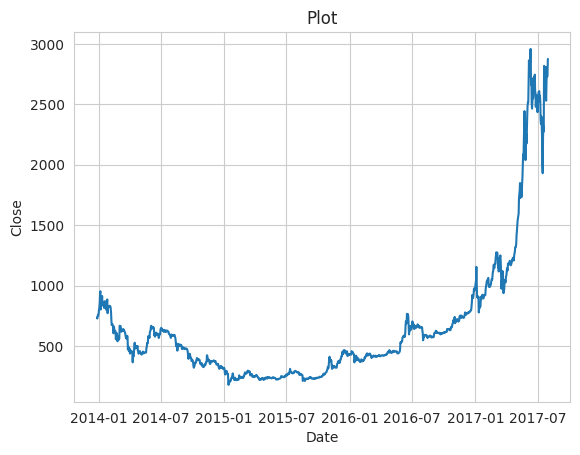

In [ ]:
# Scatter plot with day against tip
plt.plot(dataset['Date'], dataset['Close'])

# Adding Title to the Plot
plt.title("Plot")

# Setting the X and Y labels
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

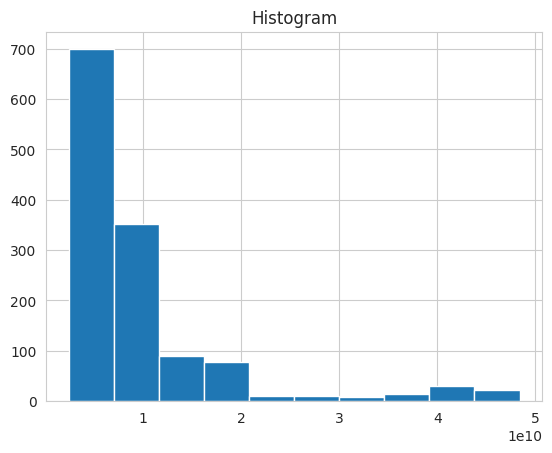

In [ ]:
plt.hist(dataset['Market Cap'])

plt.title("Histogram")

# Adding the legends
plt.show()

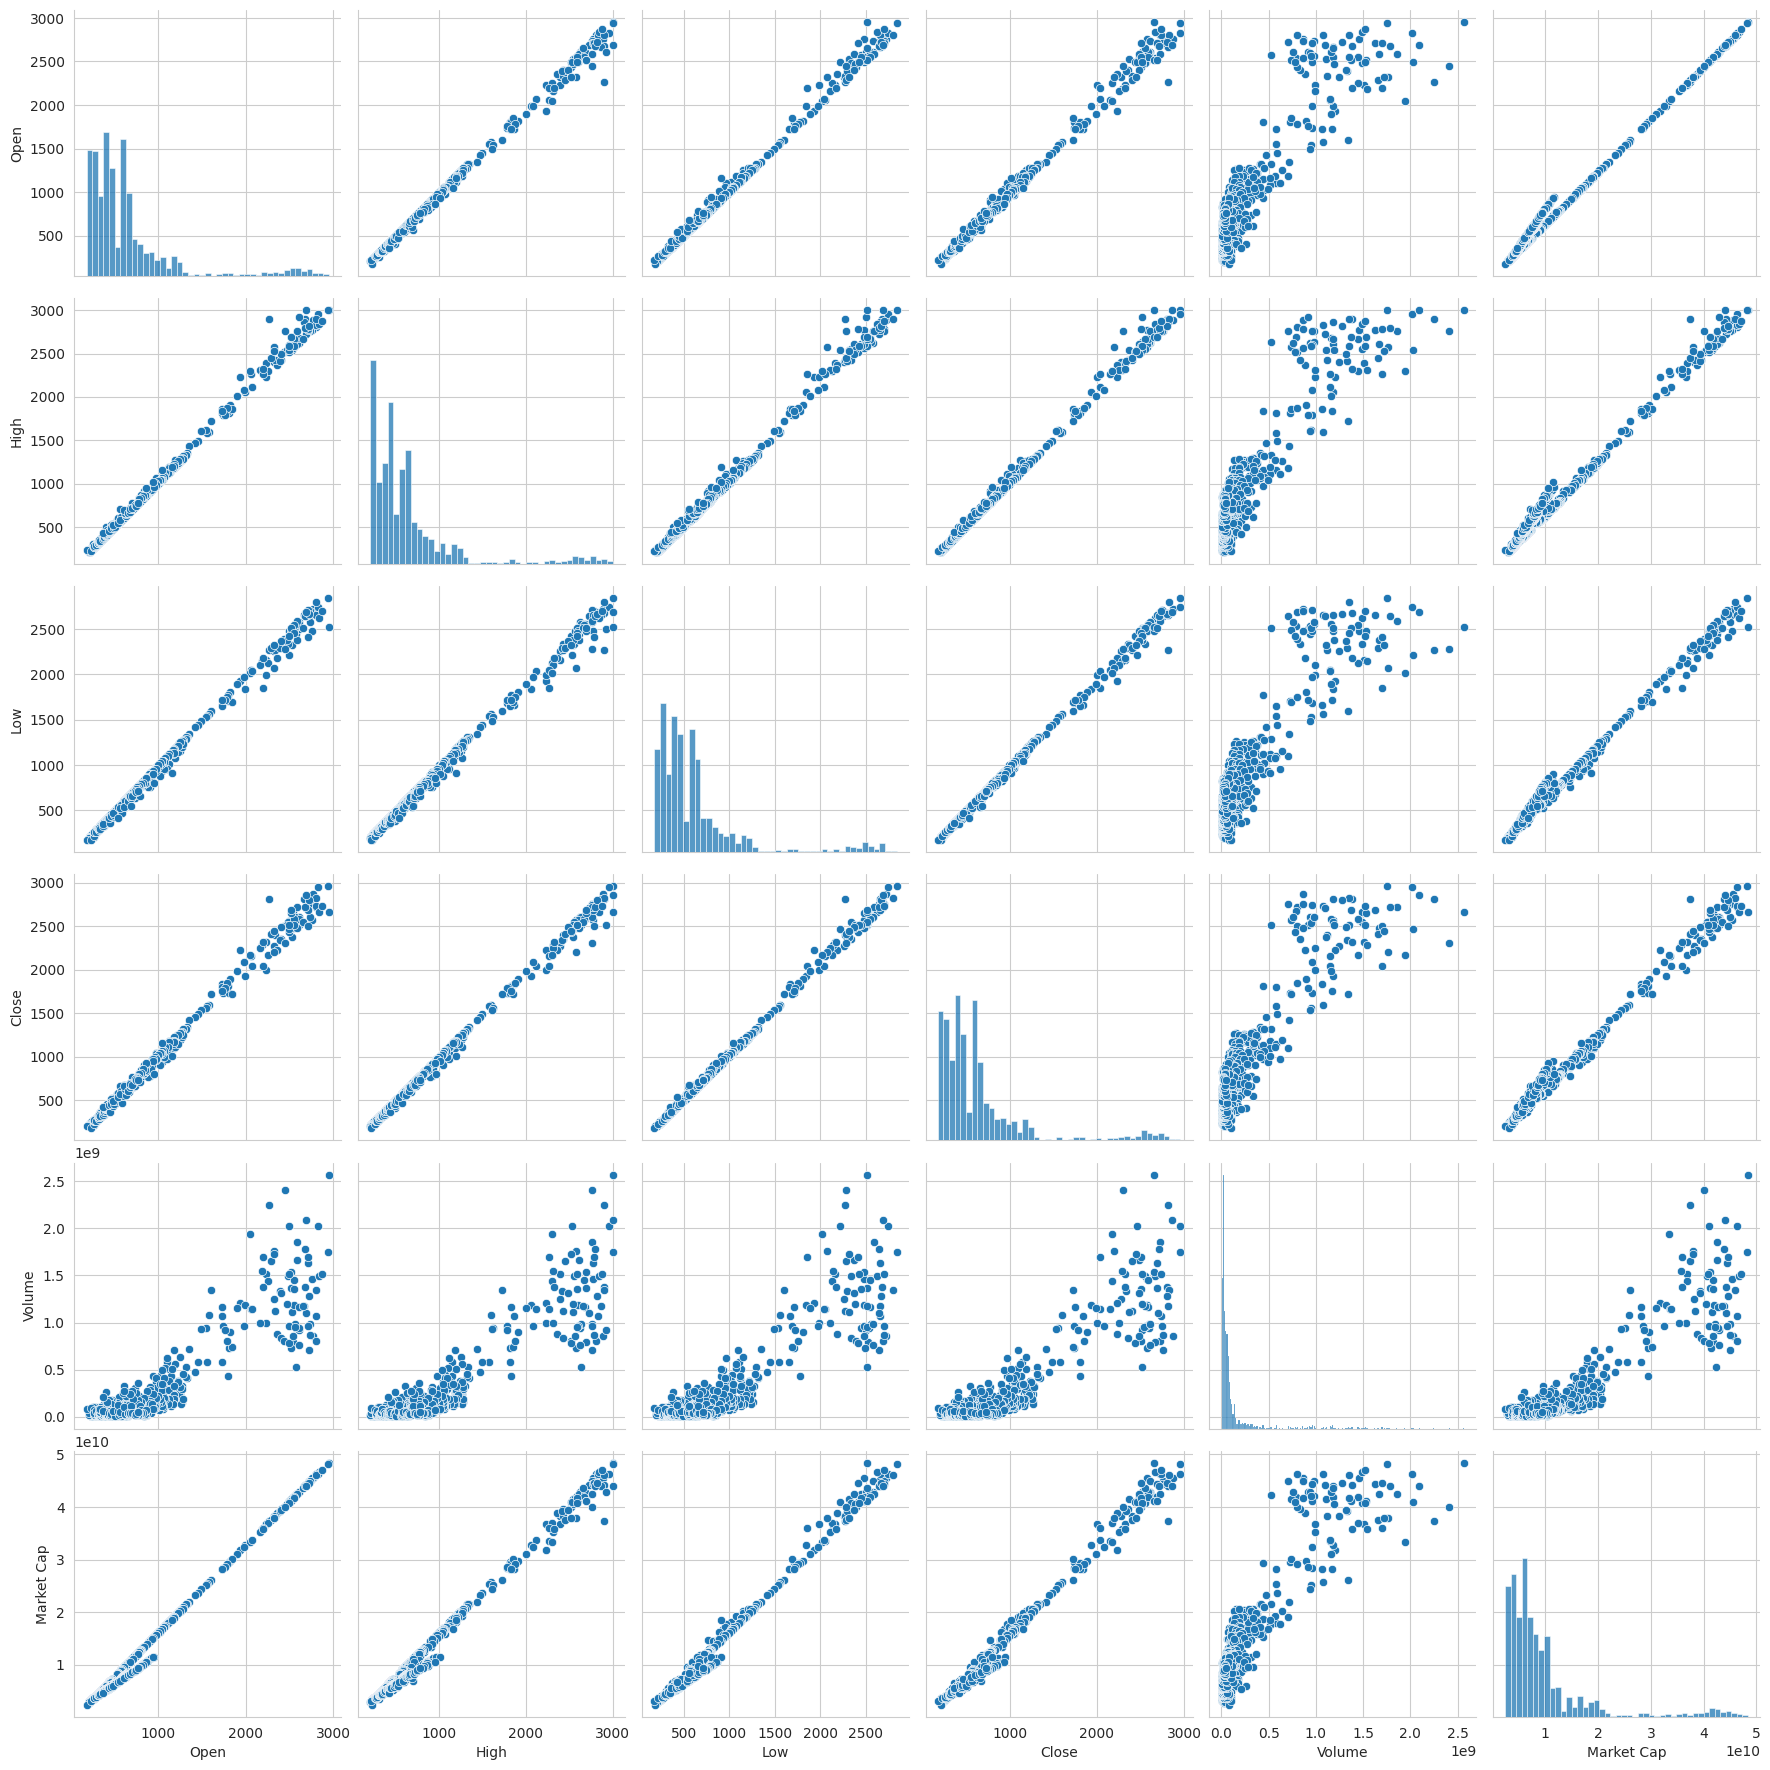

In [ ]:
sns.set_style("whitegrid");
sns.pairplot(dataset,  size=3);
plt.show()

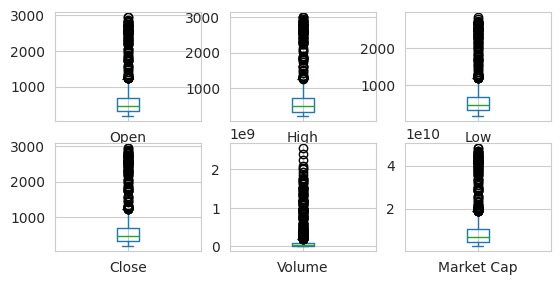

In [ ]:
import matplotlib.pyplot as plt
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False,sharey = False)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(dataset.head())

# Summary statistics
print("\nSummary statistics:")
print(dataset.describe())

# Check for missing values
print("\nMissing values:")
print(dataset.isnull().sum())



First few rows of the dataset:
        Date     Open     High      Low    Close        Volume   Market Cap
0 2017-07-31  2763.24  2889.62  2720.61  2875.34  8.605750e+08  45535800000
1 2017-07-30  2724.39  2758.53  2644.85  2757.18  7.059430e+08  44890700000
2 2017-07-29  2807.02  2808.76  2692.80  2726.45  8.037460e+08  46246700000
3 2017-07-28  2679.73  2897.45  2679.73  2809.01  1.380100e+09  44144400000
4 2017-07-27  2538.71  2693.32  2529.34  2671.78  7.891040e+08  41816500000

Summary statistics:
              Open         High          Low        Close        Volume  \
count  1313.000000  1313.000000  1313.000000  1313.000000  1.313000e+03   
mean    645.102285   660.689474   630.430274   646.565819  1.481643e+08   
std     535.041809   556.127598   517.124878   538.203788  3.242987e+08   
min     176.900000   211.730000   171.510000   178.100000  2.857830e+06   
25%     327.580000   334.660000   320.480000   327.920000  2.071070e+07   
50%     463.550000   478.620000   454.9400

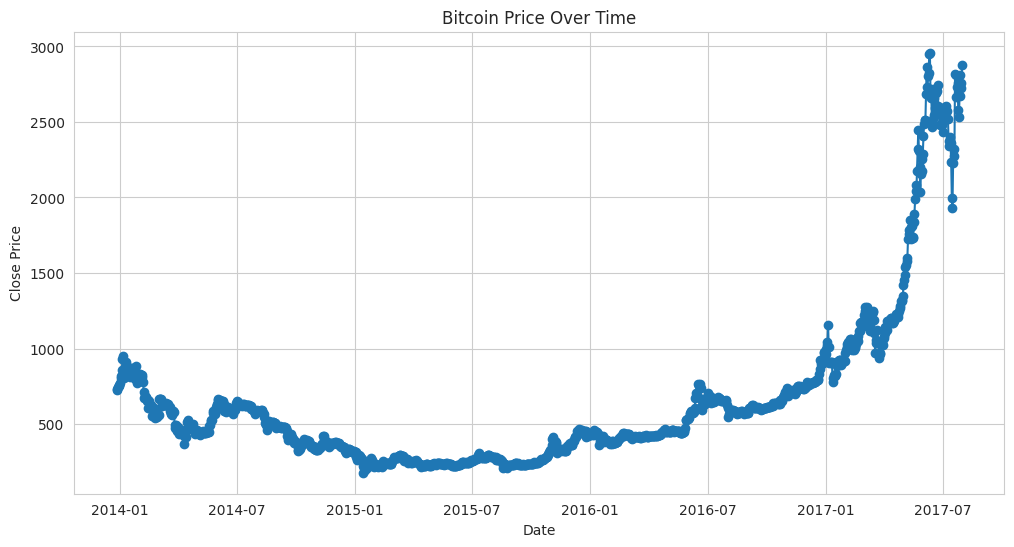

In [ ]:
# Convert 'Date' column to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Plot Bitcoin price over time
plt.figure(figsize=(12, 6))
plt.plot(dataset['Date'], dataset['Close'], marker='o', linestyle='-')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()


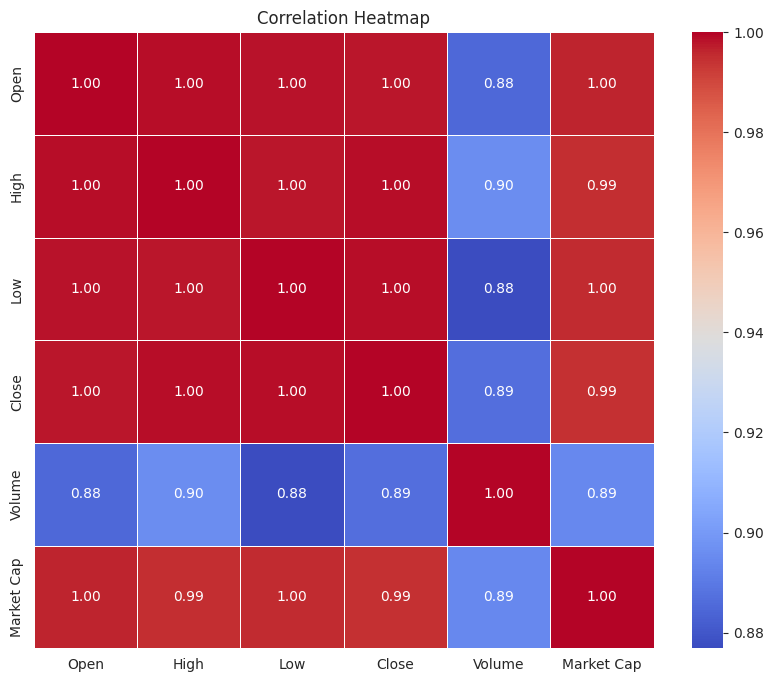

In [ ]:

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


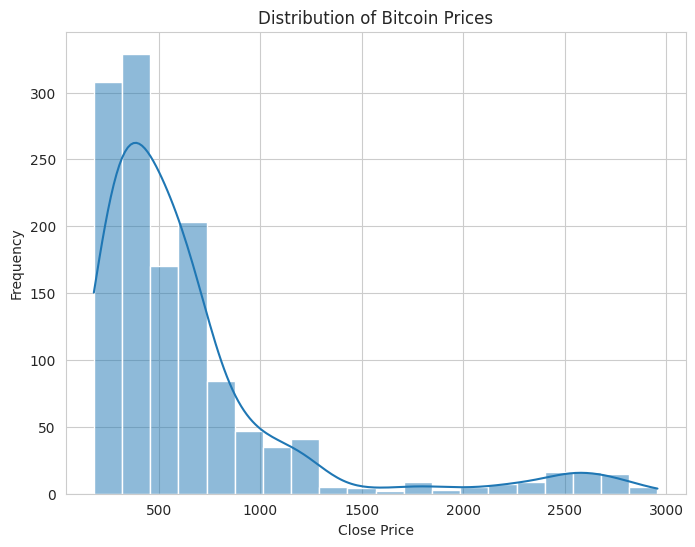

In [ ]:

# Plot distribution of Bitcoin prices
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Close'], bins=20, kde=True)
plt.title('Distribution of Bitcoin Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


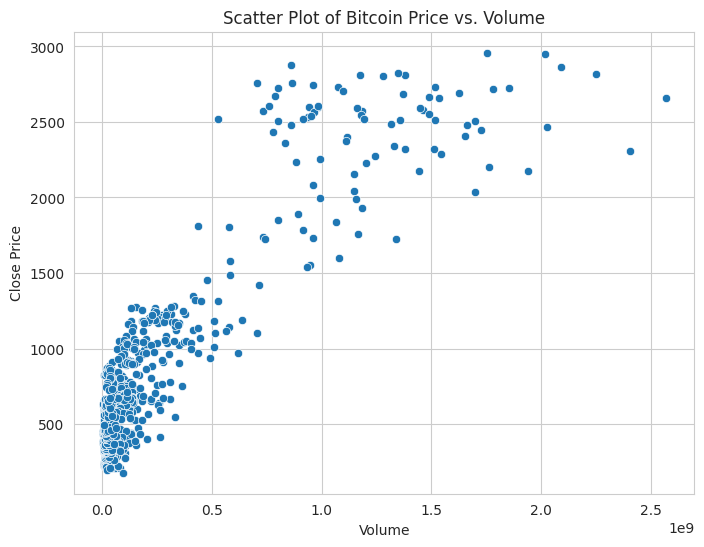

In [ ]:

# Scatter plot of Bitcoin price vs. Volume
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume', y='Close', data=dataset)
plt.title('Scatter Plot of Bitcoin Price vs. Volume')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming normalized_dataset or standardized_dataset is your preprocessed DataFrame
# Split the data into features (X) and target (y)
X = normalized_dataset.drop(columns=['Close'])  # Features (excluding 'Close' column)
y = normalized_dataset['Close']  # Target variable ('Close' column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1244, 5)
X_test shape: (312, 5)
y_train shape: (1244,)
y_test shape: (312,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_accuracy = linear_model.score(X_test, y_test)

print("Linear Regression Accuracy:", linear_accuracy)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_accuracy = svr_model.score(X_test, y_test)

print("SVR Accuracy:", svr_accuracy)

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_accuracy = dt_model.score(X_test, y_test)

print("Decision Tree Regression Accuracy:", dt_accuracy)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)

print("Random Forest Regression Accuracy:", rf_accuracy)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_accuracy = gb_model.score(X_test, y_test)

print("Gradient Boosting Regression Accuracy:", gb_accuracy)

# Neural Network Regression
nn_model = MLPRegressor()
nn_model.fit(X_train, y_train)
nn_accuracy = nn_model.score(X_test, y_test)

print("Neural Network Regression Accuracy:", nn_accuracy)


Linear Regression Accuracy: 0.9986326040036
SVR Accuracy: 0.8696893942594031
Decision Tree Regression Accuracy: 0.9944893778191858
Random Forest Regression Accuracy: 0.9971883358259278
Gradient Boosting Regression Accuracy: 0.9959745318863187
Neural Network Regression Accuracy: 0.9945972095734167


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Function to evaluate model accuracy
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    # Predict
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    # Calculate R-squared
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    # Calculate RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
    return r2_train, r2_test, rmse_train, rmse_test

# Linear Regression
print("Linear Regression:")
linear_reg = LinearRegression()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(linear_reg, X_train, X_test, y_train, y_test)
print("R-squared (Train/Test):", r2_train, "/", r2_test)
print("RMSE (Train/Test):", rmse_train, "/", rmse_test)

# Support Vector Regression (SVR)
print("\nSupport Vector Regression (SVR):")
svr = SVR()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(svr, X_train, X_test, y_train, y_test)
print("R-squared (Train/Test):", r2_train, "/", r2_test)
print("RMSE (Train/Test):", rmse_train, "/", rmse_test)

# Decision Tree Regression
print("\nDecision Tree Regression:")
decision_tree = DecisionTreeRegressor()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
print("R-squared (Train/Test):", r2_train, "/", r2_test)
print("RMSE (Train/Test):", rmse_train, "/", rmse_test)

# Random Forest Regression
print("\nRandom Forest Regression:")
random_forest = RandomForestRegressor()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(random_forest, X_train, X_test, y_train, y_test)
print("R-squared (Train/Test):", r2_train, "/", r2_test)
print("RMSE (Train/Test):", rmse_train, "/", rmse_test)

# Gradient Boosting Regression
print("\nGradient Boosting Regression:")
gradient_boosting = GradientBoostingRegressor()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test)
print("R-squared (Train/Test):", r2_train, "/", r2_test)
print("RMSE (Train/Test):", rmse_train, "/", rmse_test)

# Neural Network Regression
print("\nNeural Network Regression:")
neural_network = MLPRegressor(max_iter=1000)  # Adjust max_iter as needed
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(neural_network, X_train, X_test, y_train, y_test)
print("R-squared (Train/Test):", r2_train, "/", r2_test)
print("RMSE (Train/Test):", rmse_train, "/", rmse_test)



Linear Regression:
R-squared (Train/Test): 0.9991715991301842 / 0.9986326040036
RMSE (Train/Test): 0.005246952984454535 / 0.006673590853627906

Support Vector Regression (SVR):
R-squared (Train/Test): 0.8768290475481575 / 0.8696893942594031
RMSE (Train/Test): 0.06397953059884606 / 0.0651481829175661

Decision Tree Regression:
R-squared (Train/Test): 1.0 / 0.9943838459678752
RMSE (Train/Test): 0.0 / 0.013524833599650316

Random Forest Regression:
R-squared (Train/Test): 0.9997236170955832 / 0.9974195262402252
RMSE (Train/Test): 0.003030696781558227 / 0.009167737061901104

Gradient Boosting Regression:
R-squared (Train/Test): 0.9996900354146084 / 0.9957936817611002
RMSE (Train/Test): 0.0032095410748499992 / 0.011704786297130806

Neural Network Regression:
R-squared (Train/Test): 0.9941966455942651 / 0.9930962761152353
RMSE (Train/Test): 0.01388757592407561 / 0.014995264546527469


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_accuracy = linear_model.score(X_test, y_test)

print("Linear Regression Accuracy:", linear_accuracy)

# Support Vector Regression (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_accuracy = svr_model.score(X_test, y_test)

print("SVR Accuracy:", svr_accuracy)

# Decision Tree Regression
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_accuracy = dt_model.score(X_test, y_test)

print("Decision Tree Regression Accuracy:", dt_accuracy)

# Random Forest Regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_accuracy = rf_model.score(X_test, y_test)

print("Random Forest Regression Accuracy:", rf_accuracy)

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_accuracy = gb_model.score(X_test, y_test)

print("Gradient Boosting Regression Accuracy:", gb_accuracy)

# Neural Network Regression
nn_model = MLPRegressor()
nn_model.fit(X_train, y_train)
nn_accuracy = nn_model.score(X_test, y_test)

print("Neural Network Regression Accuracy:", nn_accuracy)


Linear Regression Accuracy: 0.9986326040036
SVR Accuracy: 0.8696893942594031
Decision Tree Regression Accuracy: 0.9943584044760516
Random Forest Regression Accuracy: 0.997368332840663
Gradient Boosting Regression Accuracy: 0.9959715046341192
Neural Network Regression Accuracy: 0.9938600074624947


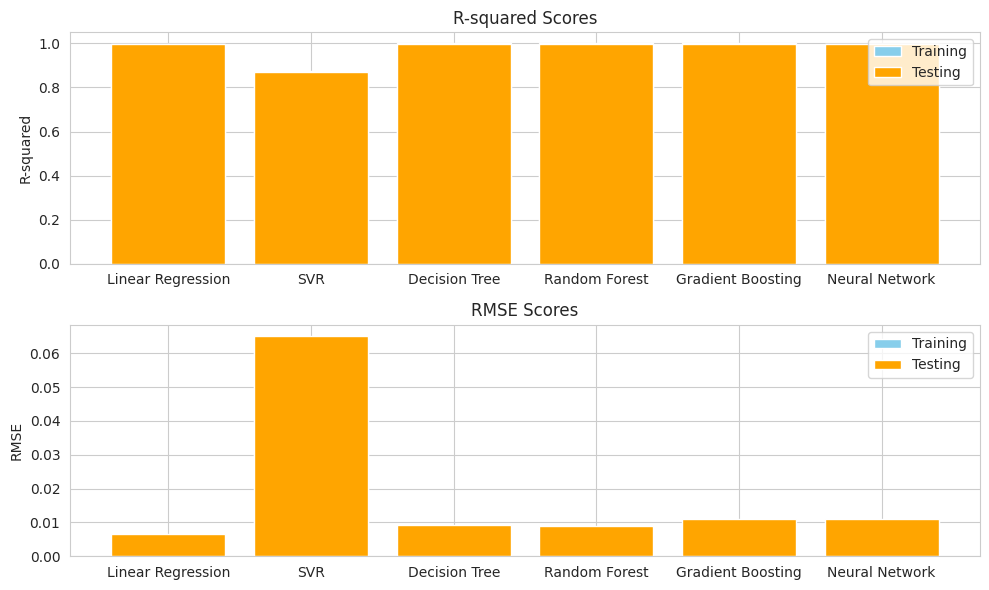

In [ ]:
import matplotlib.pyplot as plt

# Initialize lists to store metrics for each algorithm
models = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']
r2_train_scores = []
r2_test_scores = []
rmse_train_scores = []
rmse_test_scores = []

# Function to append scores to lists
def append_scores(r2_train, r2_test, rmse_train, rmse_test):
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)
    rmse_train_scores.append(rmse_train)
    rmse_test_scores.append(rmse_test)

# Linear Regression
linear_reg = LinearRegression()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(linear_reg, X_train, X_test, y_train, y_test)
append_scores(r2_train, r2_test, rmse_train, rmse_test)

# Support Vector Regression (SVR)
svr = SVR()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(svr, X_train, X_test, y_train, y_test)
append_scores(r2_train, r2_test, rmse_train, rmse_test)

# Decision Tree Regression
decision_tree = DecisionTreeRegressor()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(decision_tree, X_train, X_test, y_train, y_test)
append_scores(r2_train, r2_test, rmse_train, rmse_test)

# Random Forest Regression
random_forest = RandomForestRegressor()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(random_forest, X_train, X_test, y_train, y_test)
append_scores(r2_train, r2_test, rmse_train, rmse_test)

# Gradient Boosting Regression
gradient_boosting = GradientBoostingRegressor()
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(gradient_boosting, X_train, X_test, y_train, y_test)
append_scores(r2_train, r2_test, rmse_train, rmse_test)

# Neural Network Regression
neural_network = MLPRegressor(max_iter=1000)
r2_train, r2_test, rmse_train, rmse_test = evaluate_model(neural_network, X_train, X_test, y_train, y_test)
append_scores(r2_train, r2_test, rmse_train, rmse_test)

# Plotting
plt.figure(figsize=(10, 6))

# R-squared Scores
plt.subplot(2, 1, 1)
plt.bar(models, r2_train_scores, color='skyblue', label='Training')
plt.bar(models, r2_test_scores, color='orange', label='Testing')
plt.title('R-squared Scores')
plt.ylabel('R-squared')
plt.legend()

# RMSE Scores
plt.subplot(2, 1, 2)
plt.bar(models, rmse_train_scores, color='skyblue', label='Training')
plt.bar(models, rmse_test_scores, color='orange', label='Testing')
plt.title('RMSE Scores')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()


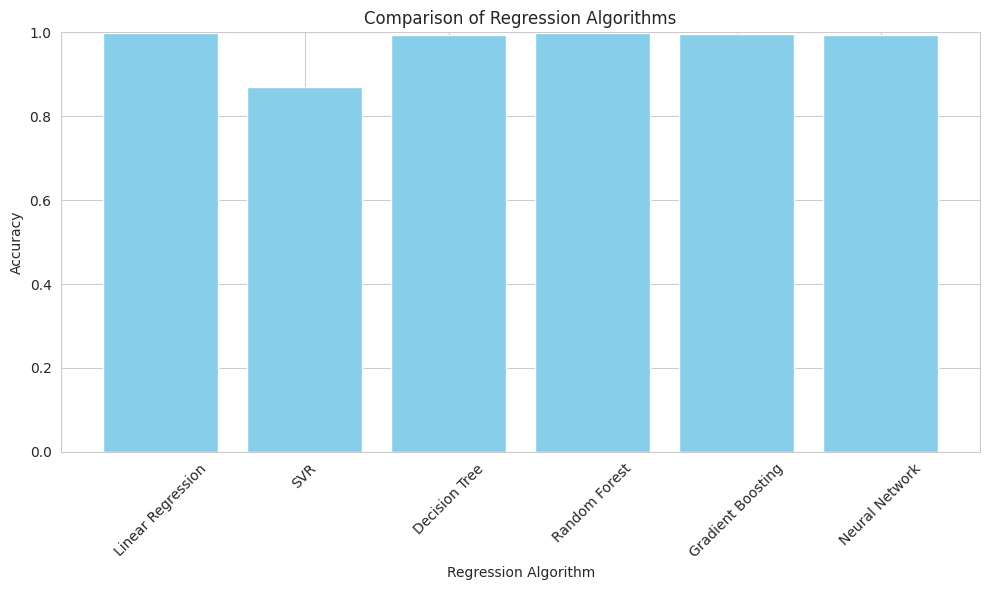

In [ ]:
import matplotlib.pyplot as plt

# Define the names of the algorithms
models = ['Linear Regression', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Neural Network']

# Define the accuracy scores of each algorithm
accuracies = [linear_accuracy, svr_accuracy, dt_accuracy, rf_accuracy, gb_accuracy, nn_accuracy]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Regression Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Regression Algorithms')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

train, test = train_test_split(dataset, train_size=0.8)
arima_model = ARIMA(train['Close'], order=(5,1,0))
arima_result = arima_model.fit()
forecast_arima = arima_result.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')



print("ARIMA Forecast:", forecast_arima)


ARIMA Forecast: 1050    791.286893
1051    799.724993
1052    902.510449
1053    604.722385
1054    622.020348
           ...    
1308    691.530091
1309    691.530091
1310    691.530091
1311    691.530091
1312    691.530091
Name: predicted_mean, Length: 263, dtype: float64


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
train, test = train_test_split(dataset, train_size=0.8)
sarima_model = SARIMAX(dataset['Close'], order=(5,1,0), seasonal_order=(1,1,1,12)) # You may need to adjust the order and seasonal_order based on the data
sarima_result = sarima_model.fit()

# Forecast
forecast_sarima = sarima_result.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')
print("SARIMA Forecast:", forecast_sarima)


SARIMA Forecast: 1050    467.853413
1051    477.274286
1052    472.708666
1053    473.773699
1054    477.023261
           ...    
1308    768.974469
1309    752.428999
1310    757.031588
1311    741.640622
1312    726.250900
Name: predicted_mean, Length: 263, dtype: float64
